In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkartreview/flipkart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv('/kaggle/input/flipkartreview/flipkart.csv', index_col=0)
df = df.head(500)
print(df.shape)
df.head()

(500, 3)


,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


# **EDA**

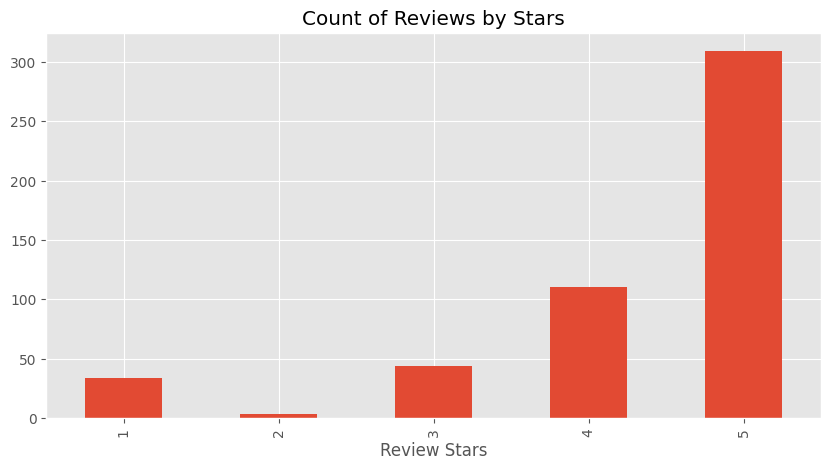

In [4]:
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar',
      title = 'Count of Reviews by Stars',
      figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

# **NLTK**

In [5]:
example = df['Review'][50]

In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Read', 'this', 'if', 'you', "'re", 'going', 'to', 'buy', 'any', 'laptopMy']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Read', 'VB'),
 ('this', 'DT'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ("'re", 'VBP'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('buy', 'VB'),
 ('any', 'DT'),
 ('laptopMy', 'JJ')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Read/VB
  this/DT
  if/IN
  you/PRP
  're/VBP
  going/VBG
  to/TO
  buy/VB
  any/DT
  laptopMy/JJ
  advice/NN
  is/VBZ
  please/JJ
  not/RB
  to/TO
  look/VB
  brand/NN
  in/IN
  buying/VBG
  laptops/NNS
  .The/JJ
  laptops/NNS
  with/IN
  same/JJ
  specs/NN
  of/IN
  brands/NNS
  hp/NNS
  ,/,
  full/JJ
  ,/,
  aver/RB
  ,/,
  lenovo/NN
  ,/,
  asus/NN
  etc/NN
  are/VBP
  same/JJ
  To/TO
  get/VB
  to/TO
  for/IN
  minimum/NN
  cost/NN
  try/NN
  (ORGANIZATION asusDont/NN)
  feel/VB
  asus/NN
  is/VBZ
  not/RB
  as/RB
  good/JJ
  as/IN
  hp/NN
  or/CC
  dellFor/VB
  this/DT
  laptopPros-/JJ
  ●high/JJ
  speed/NN
  boot/NN
  up/RP
  (/(
  faster/JJR
  than/IN
  mac/JJ
  pro/FW
  )/)
  ●/FW
  intel/NN
  i3/NN
  good/JJ
  performance/NN
  if/IN
  your/PRP$
  use/NN
  is/VBZ
  home/NN
  ,/,
  student/NN
  ,/,
  and/CC
  coding●extra/JJ
  slot/NN
  for/IN
  ram.if/NN
  you/PRP
  add/VBP
  8/CD
  gb/JJ
  ram/NN
  (/(
  you/PRP
  can/MD
  get/VB
  for/IN
  just/RB
  2500/CD
  in/IN
  fl

# **Sentiment Scoring**

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [11]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [12]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.922, 'pos': 0.025, 'compound': -0.3637}

In [13]:
#Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Product_name']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Product_name'})
vaders = vaders.merge(df, how='left')


In [15]:
#Now we have sentiment score and metadat
vaders.head()

,Product_name,neg,neu,pos,compound,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,0.0,0.881,0.119,0.5789,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,0.0,0.881,0.119,0.5789,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,0.0,0.881,0.119,0.5789,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,0.0,0.672,0.328,0.2382,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,0.0,0.672,0.328,0.2382,"Light weight laptop with new amazing features,...",5


# Plot Vader Results

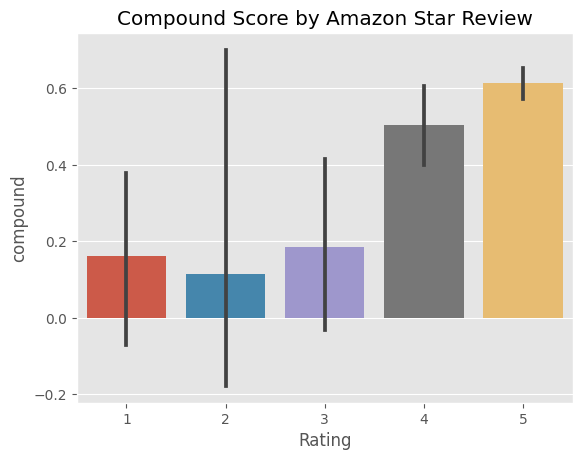

In [16]:
ax = sns.barplot(data=vaders, x = "Rating", y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

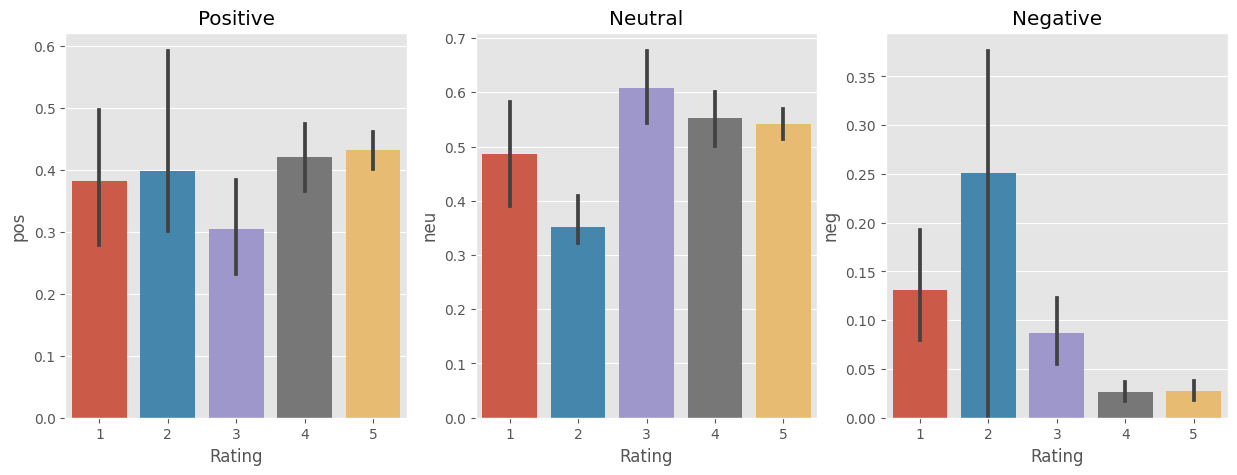

In [17]:
fig, axs = plt.subplots(1,3,figsize=(15, 5))
sns.barplot(data=vaders, x="Rating", y="pos", ax = axs[0])
sns.barplot(data=vaders, x="Rating", y="neu", ax = axs[1])
sns.barplot(data=vaders, x="Rating", y="neg", ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

from transformers import AutoTokenizer

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [20]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Read this if you're going to buy any laptopMy advice is please not to look brand in buying laptops .The laptops with same specs of brands hp,full,aver,lenovo,asus etc are same To get to for minimum cost try asusDont feel asus is not as good as hp or dellFor this laptopPros- ●high speed boot up(faster than mac pro)● intel i3 good performance if your use is home,student,and coding●extra slot for ram.if you add 8 gb ram(you can get for just 2500 in flipkart and can add it yourself)You ...


{'neg': 0.053, 'neu': 0.922, 'pos': 0.025, 'compound': -0.3637}

In [21]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.12891787, 'roberta_neu': 0.46794707, 'roberta_pos': 0.40313506}


In [22]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['Product_name']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Product_name'})
results_df = results_df.merge(df, how='left')

In [25]:
results_df.head()

,Product_name,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,0.0,0.881,0.119,0.5789,0.077736,0.282267,0.639997,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,0.0,0.881,0.119,0.5789,0.077736,0.282267,0.639997,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,0.0,0.881,0.119,0.5789,0.077736,0.282267,0.639997,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,0.0,0.672,0.328,0.2382,0.093249,0.393783,0.512968,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,0.0,0.672,0.328,0.2382,0.093249,0.393783,0.512968,"Light weight laptop with new amazing features,...",5


# Compare Scores between Models

In [26]:
results_df.columns

Index(['Product_name', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Review', 'Rating'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

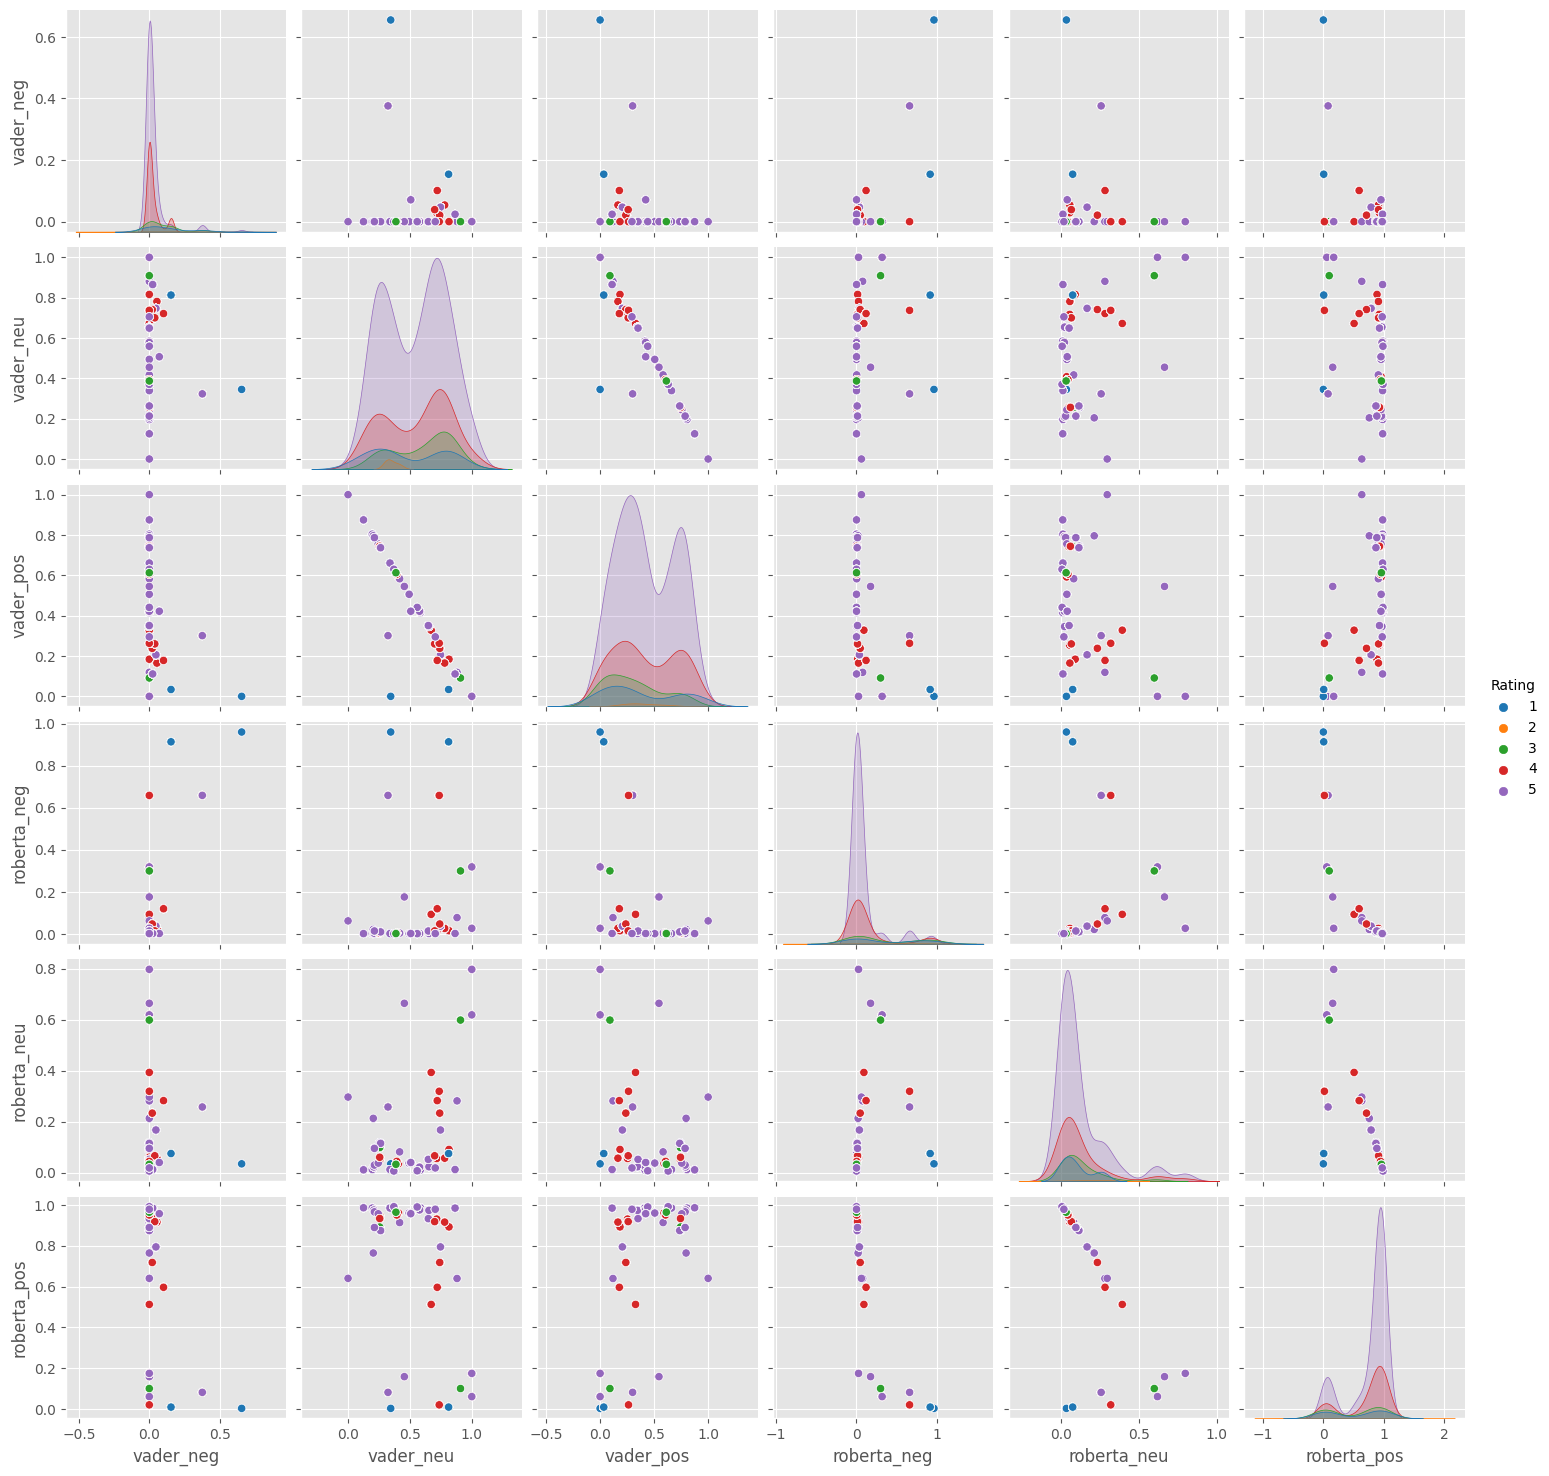

In [27]:
sns.pairplot(data = results_df, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = 'Rating',
            palette='tab10')
plt.show()

In [28]:
results_df.query('Rating == 1').sort_values('vader_pos', ascending = False)['Review'].values[0]

'Poor camera quality Infact same time not working Poor displayPoor performanceNothing is good in this set'

In [29]:
# negative sentiment 5 star review

results_df.query('Rating == 5').sort_values('vader_neg', ascending = False)['Review'].values[0]

'This price range it’s super…..'